In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [16]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data_copy = df.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [18]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

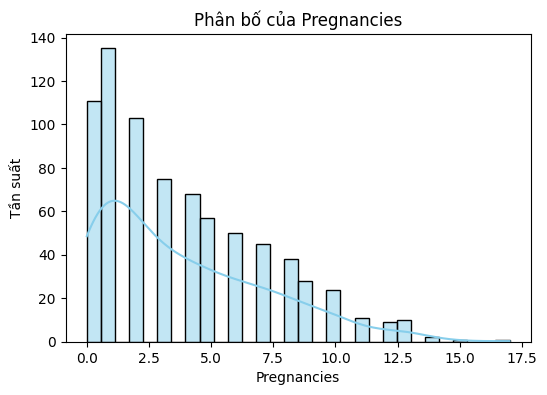

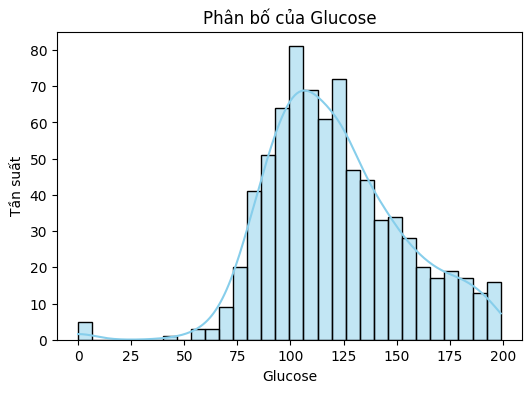

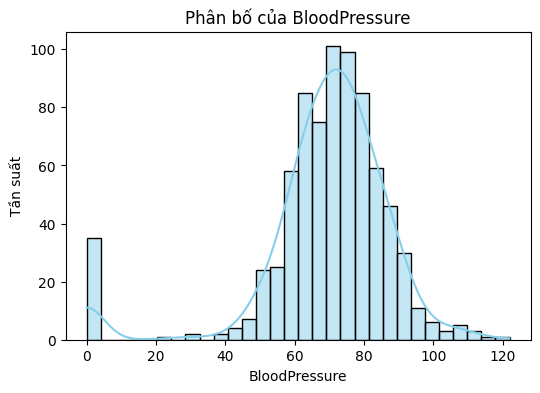

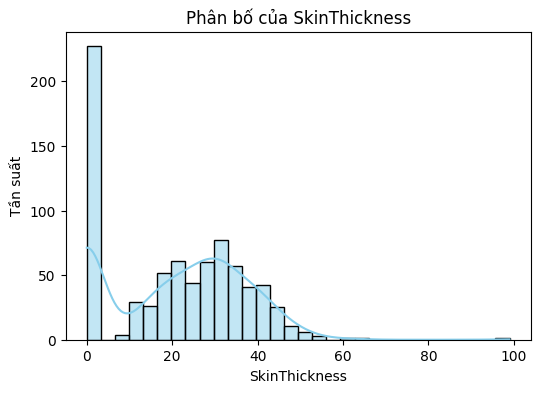

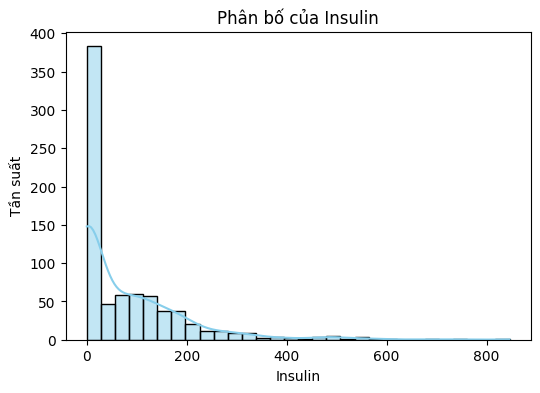

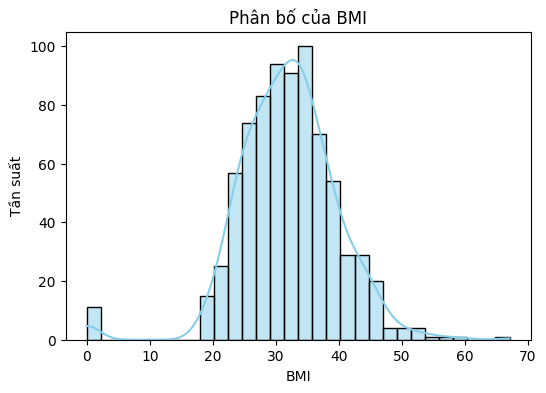

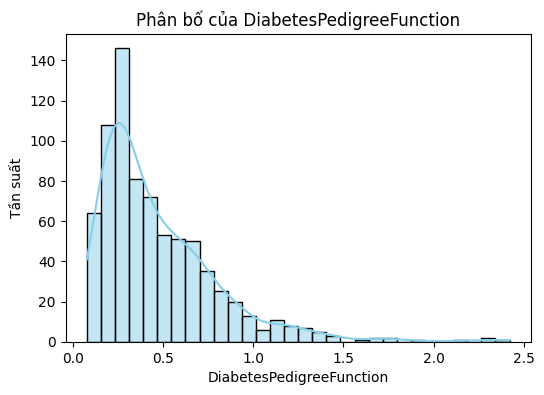

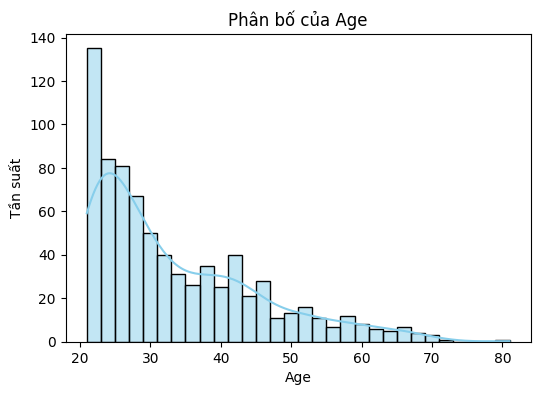

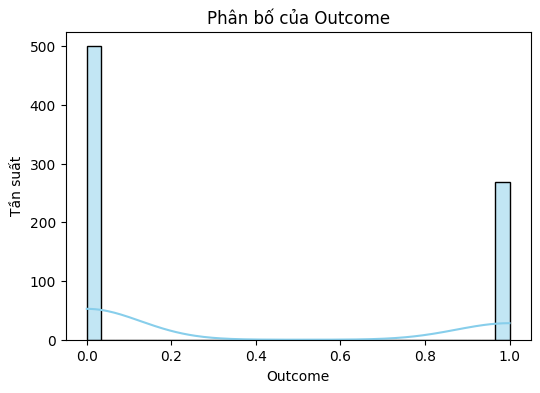

In [19]:
num_col = df.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()

In [ ]:

data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1586746561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1586746561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Giả sử df đã replace 0 bằng NaN
data_copy_MICE = df.copy(deep=True)
cols_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data_copy_MICE[cols_missing] = data_copy_MICE[cols_missing].replace(0, np.nan)

# Tạo MICE imputer
imp = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

# Chỉ áp dụng cho các cột numeric
data_copy_MICE[cols_missing] = imp.fit_transform(data_copy_MICE[cols_missing])

print(data_copy_MICE.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0         35.000  404.235687  33.6   
1            1     85.0           66.0         29.000  101.785577  26.6   
2            8    183.0           64.0         20.114  242.983223  23.3   
3            1     89.0           66.0         23.000   94.000000  28.1   
4            0    137.0           40.0         35.000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


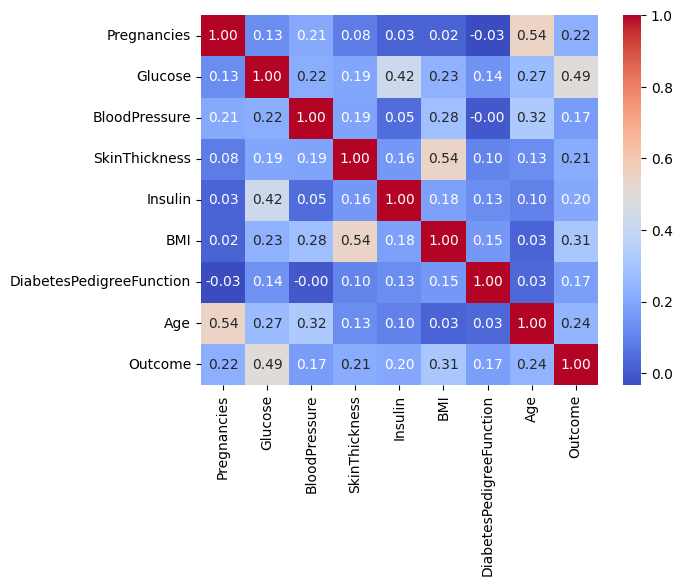

In [22]:
temp = data_copy.select_dtypes(include=[np.number])

corr = temp.corr()
plt.Figure(dpi=30)
sns.heatmap(corr,annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

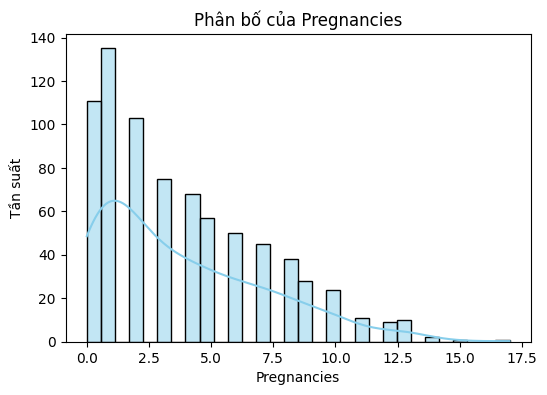

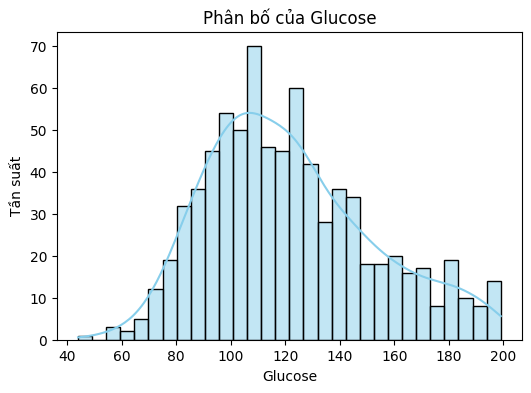

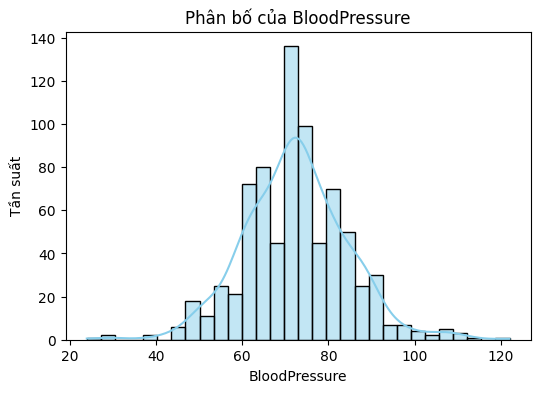

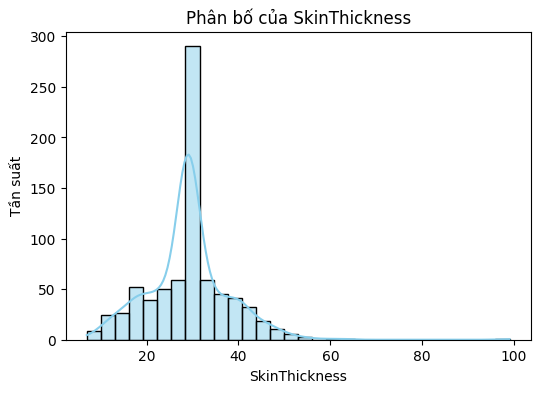

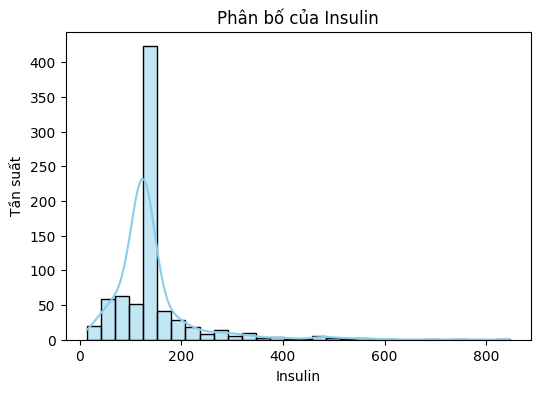

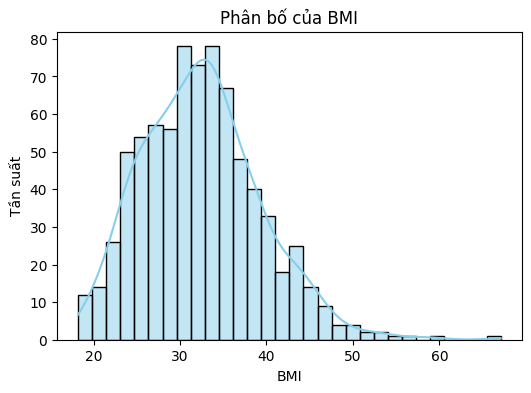

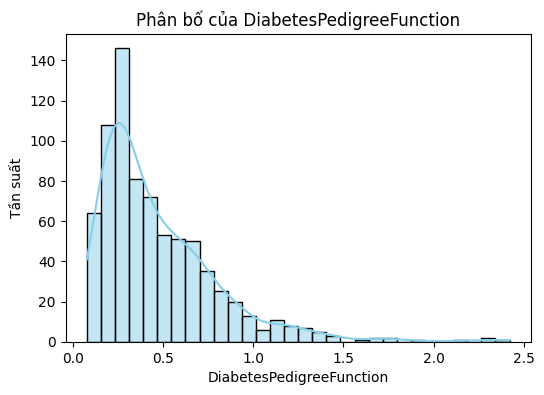

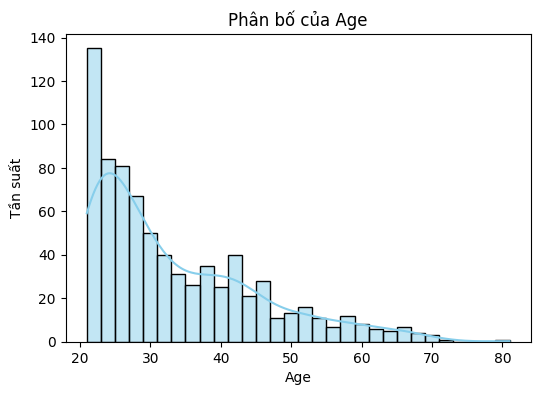

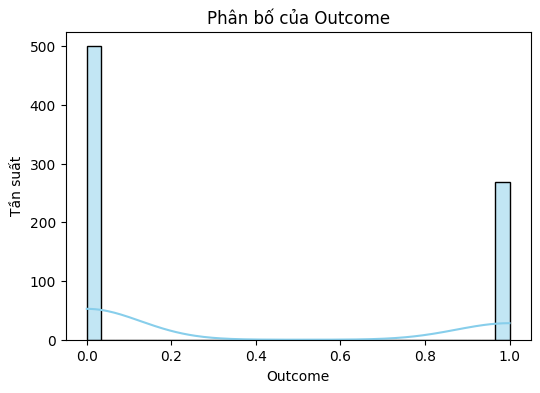

In [21]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()

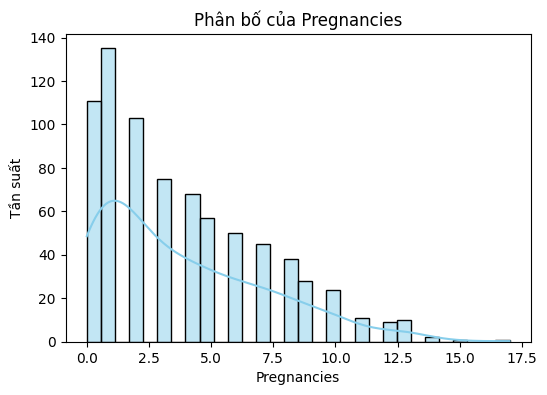

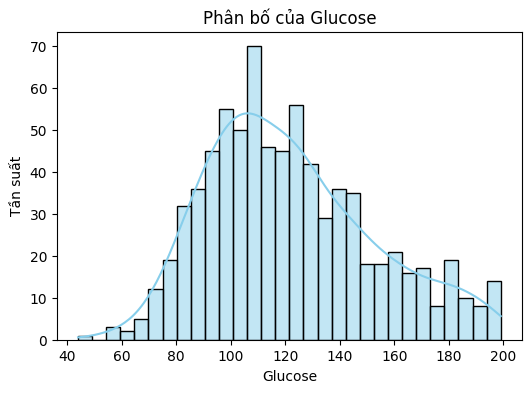

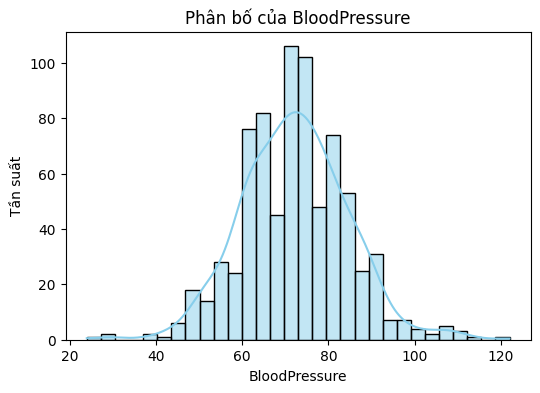

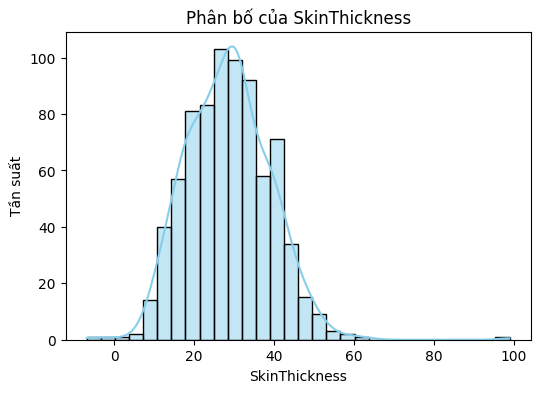

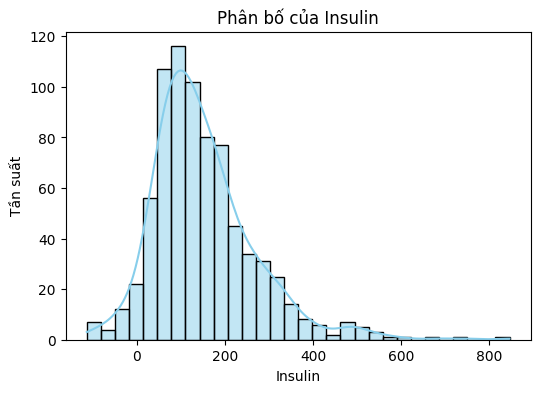

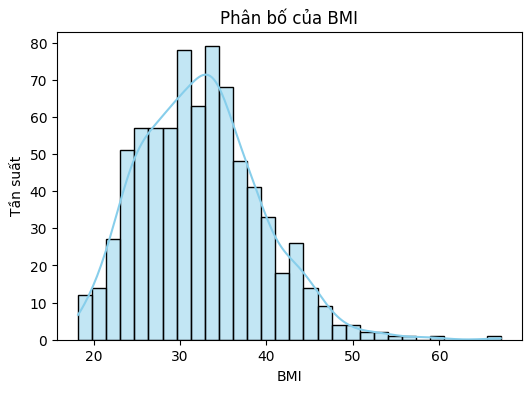

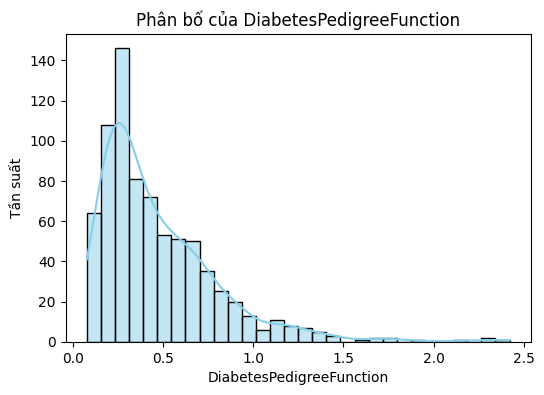

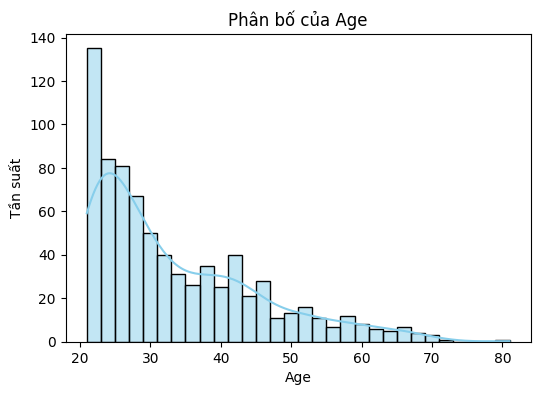

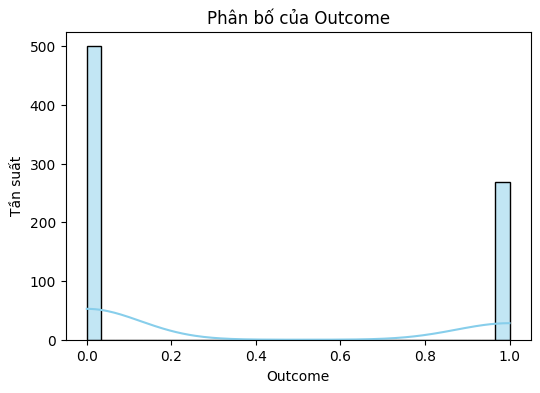

In [32]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy_MICE[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


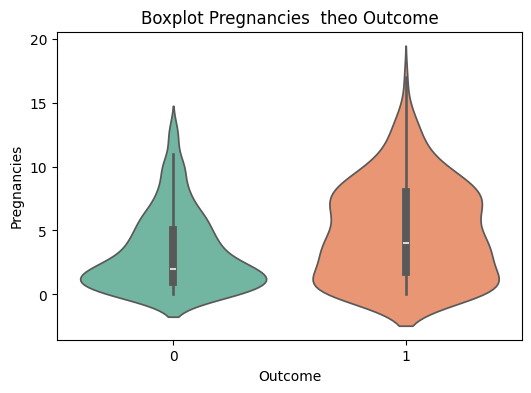

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


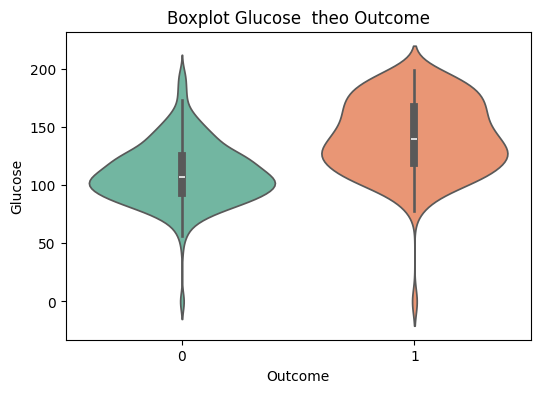

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


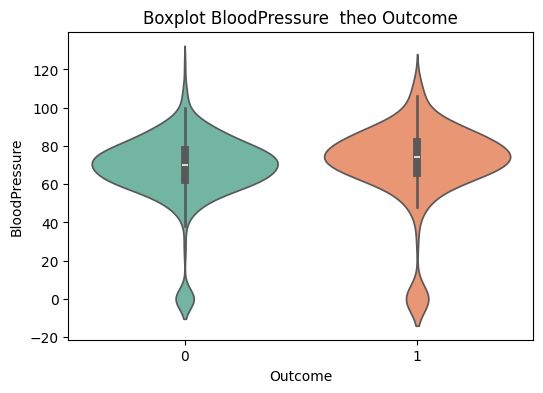

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


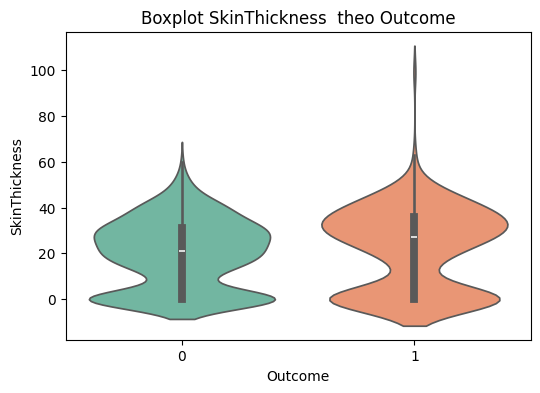

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


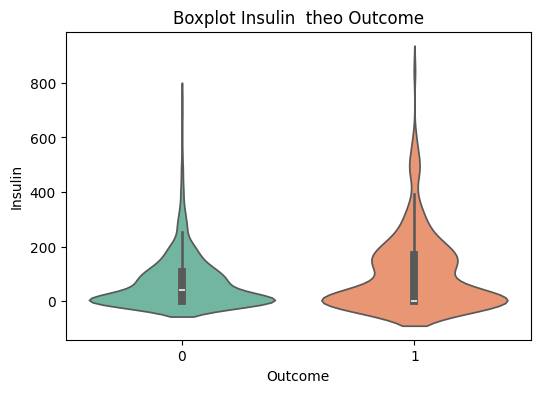

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


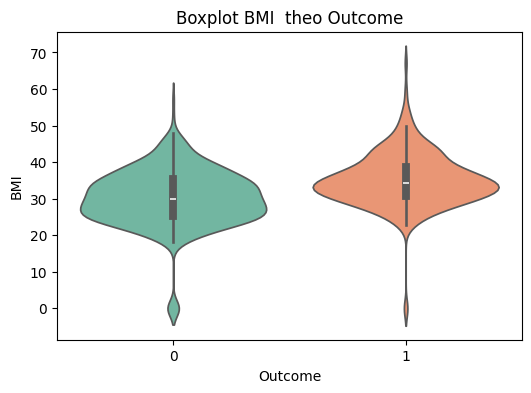

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


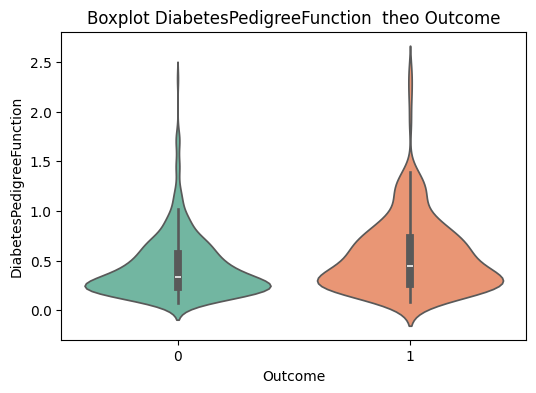

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


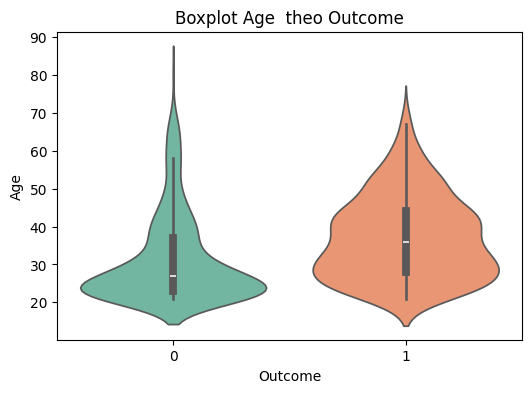

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1554923744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


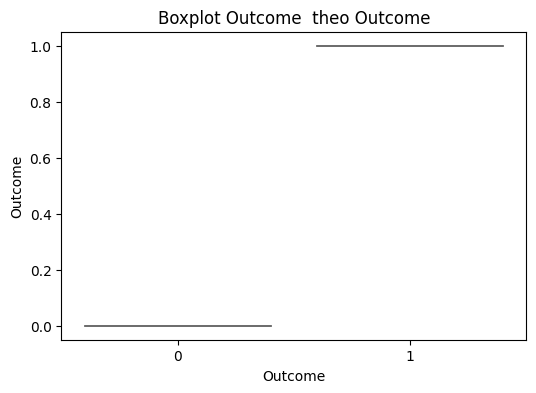

In [33]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


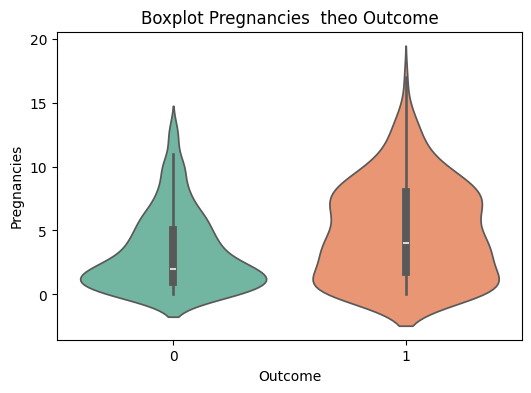

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


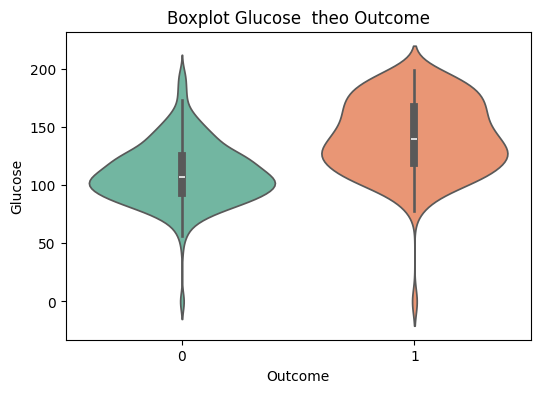

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


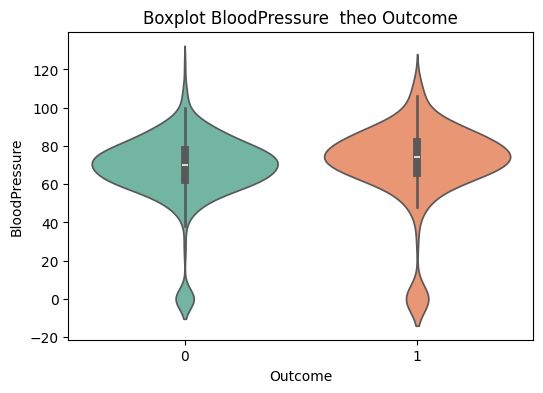

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


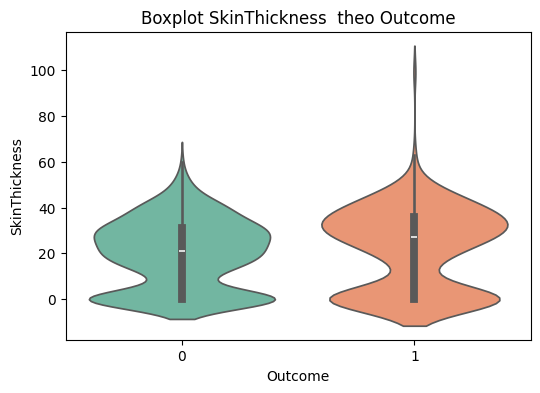

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


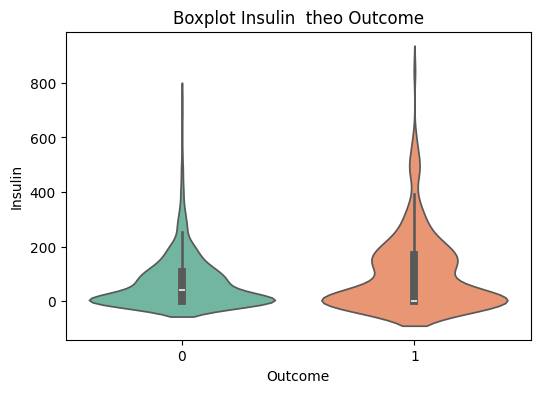

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


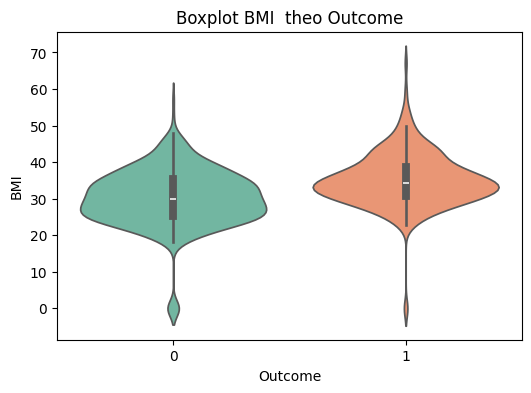

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


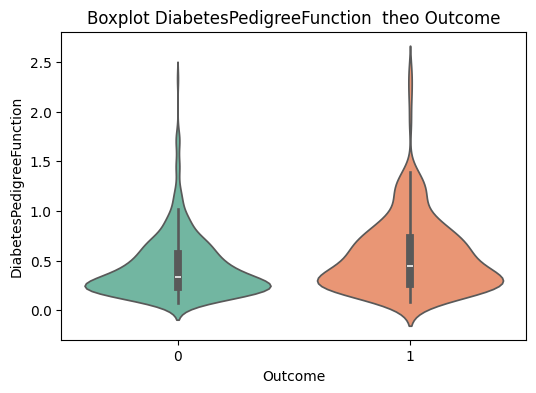

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


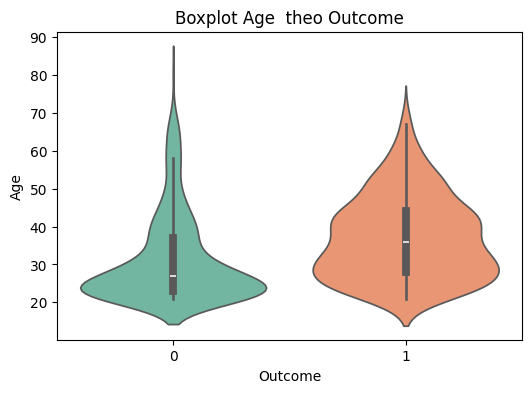

C:\Users\HP\AppData\Local\Temp\ipykernel_12692\1467763579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")


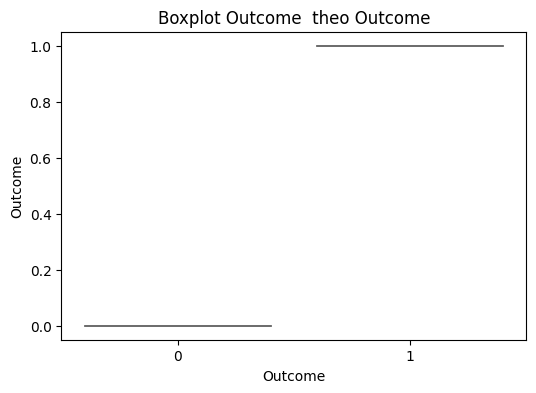

In [35]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

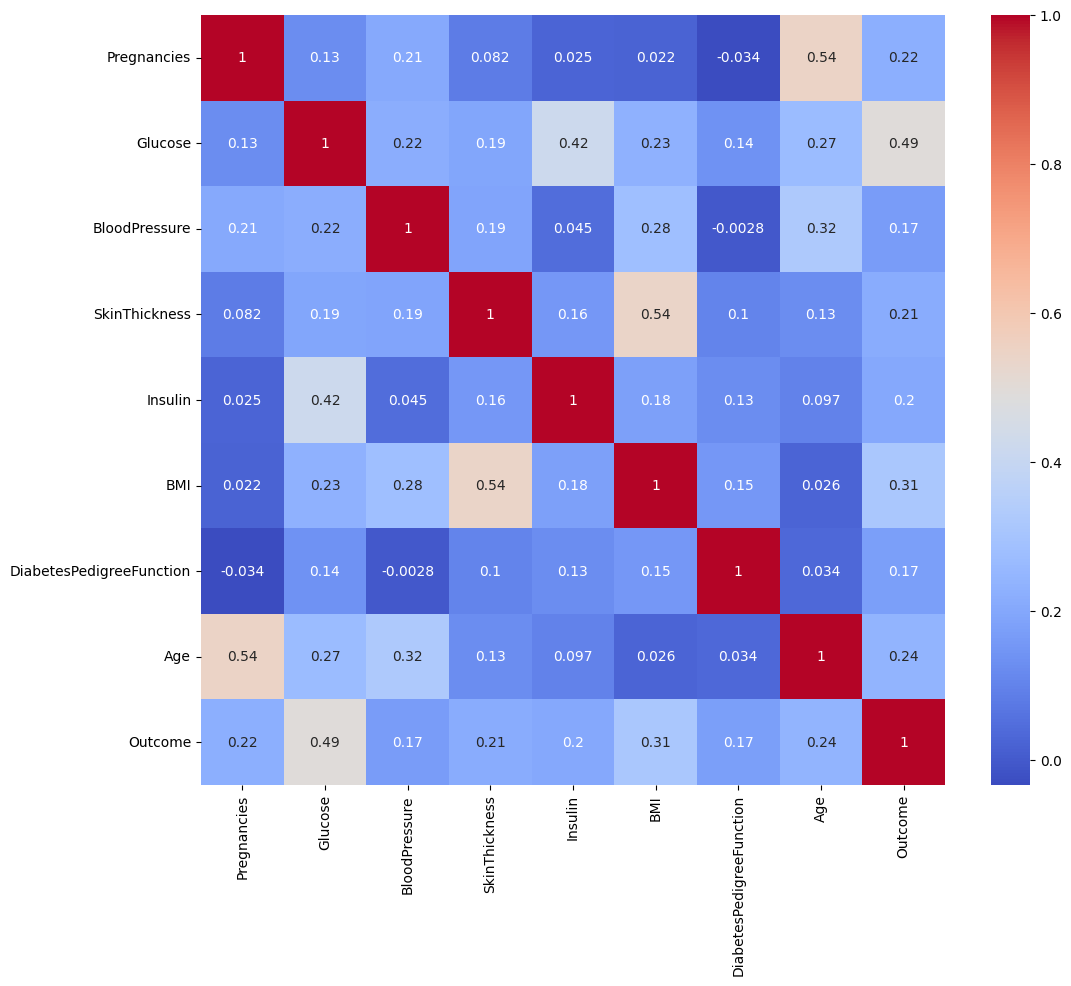

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='coolwarm')

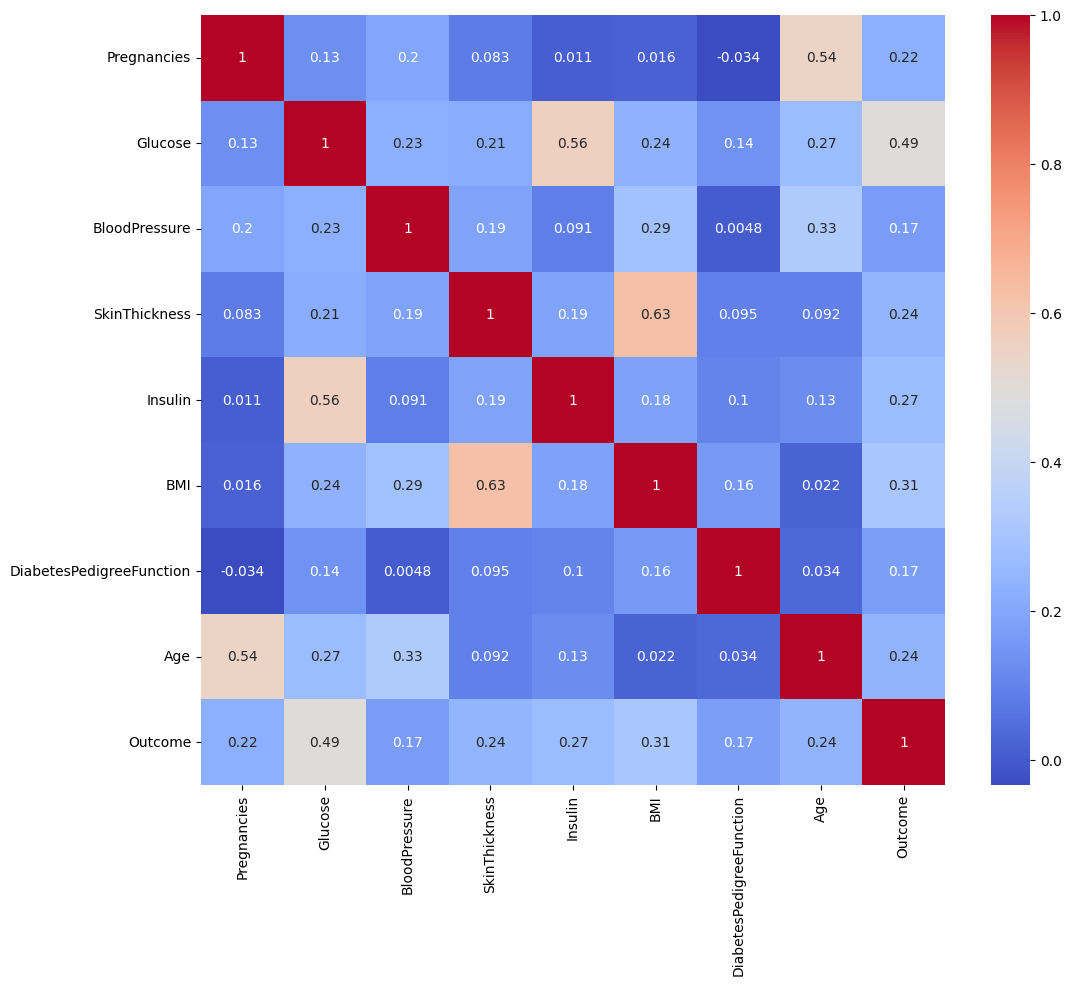

In [38]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy_MICE.corr(), annot=True,cmap ='coolwarm')

In [40]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('Outcome', axis=1)
y = data_copy['Outcome']

X_MIKE = data_copy_MICE.drop('Outcome', axis=1)
y_MIKE = data_copy_MICE['Outcome']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train_MIKE, X_val_MIKE, y_train_MIKE, y_val_MIKE = train_test_split(
    X_MIKE, y_MIKE, test_size=0.2, random_state=42, stratify=y
)



In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)


y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [43]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train_MIKE, y_train_MIKE)

y_val_pred = model.predict(X_val_MIKE)


y_pred = model.predict(X_val_MIKE)
y_prob = model.predict_proba(X_val_MIKE)[:,1]

acc = accuracy_score(y_val_MIKE, y_pred)
f1 = f1_score(y_val_MIKE, y_pred)
roc_auc = roc_auc_score(y_val_MIKE, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi